In [54]:
import numpy as np
import pandas as pd

In [55]:
raw_train = pd.read_csv("train.csv")

In [56]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
raw_train.shape

(891, 12)

In [58]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
all_cols = list(raw_train)
num_data = [i for i in list(raw_train) if raw_train[i].dtypes != "object"]
cat_data = [i for i in list(raw_train) if raw_train[i].dtypes == "object"]
print(f"The numerical attributes are: {num_data}")

The numerical attributes are: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


#### Dividing the dataset into numerical dataset and categorical dataset

In [61]:
raw_copied = raw_train.copy()
num_dataset = raw_train.copy()
cat_dataset = raw_train.copy()
for i in cat_data:
    num_dataset.drop(columns=i, inplace=True)
for i in num_data:
    cat_dataset.drop(columns=i, inplace=True)

In [62]:
num_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [63]:
cat_dataset

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


### Convert sex to integer counterparts for more efficient data processing by model

In [64]:
for i in range (len(cat_dataset["Sex"])):
    if cat_dataset["Sex"].iloc[i] == 'male':
        cat_dataset["Sex"].iloc[i] = np.float32(1)
    else:
        cat_dataset["Sex"].iloc[i] = np.float32(0)


/tmp/ipykernel_4701/1782178432.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cat_dataset["Sex"].iloc[i] = np.float32(1)
/tmp/ipykernel_4701/1782178432.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
Yo

In [65]:
cat_dataset["Sex"] = cat_dataset["Sex"].astype(float)
cat_dataset

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1.0,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",0.0,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,113803,C123,S
4,"Allen, Mr. William Henry",1.0,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",1.0,211536,NaN,S
887,"Graham, Miss. Margaret Edith",0.0,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",1.0,111369,C148,C


In [66]:
num_dataset = num_dataset.join(cat_dataset["Sex"])
num_dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,1,0,3,22.0,1,0,7.2500,1.0
1,2,1,1,38.0,1,0,71.2833,0.0
2,3,1,3,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0
887,888,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,NaN,1,2,23.4500,0.0
889,890,1,1,26.0,0,0,30.0000,1.0


In [67]:
cat_dataset.drop(columns=["Sex"], inplace=True)
# cat_dataset  #print the dataset to see the desired output if necessary

Whenever conversion is happening from pandas dataframe to numpy array the data type changes to object for the entire array because numpy array can only have 1 datatype and mixture of datatypes forces numpy to cast all the data to object type
To avoid this I did not create a class for sex datatype conversion and did the conversion utilizing pandas and numpy

#### construct the correlation matrix for the transformed data

In [68]:
corr_matrix = num_dataset.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

### Transform the Embarked column with OneHotEncoder

#### The approach I am using is:
- Firstly clean the data by filling the nan columns
- To fill the nan values i am using the most frequent value of the column 

In [69]:
cat_dataset['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [70]:
cat_dataset['Embarked'].value_counts().idxmax()

'S'

#### class to fill the nan values present in Embarked column

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

class FillnaEmbarked(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X["Embarked"] = X["Embarked"].fillna(X["Embarked"].value_counts().idxmax())
        return X.to_numpy()

In [72]:
fillna_embark = FillnaEmbarked()
raw_train_embark_arr = fillna_embark.transform(cat_dataset)
raw_train_embark_filled = pd.DataFrame(raw_train_embark_arr, columns=list(cat_dataset))
raw_train_embark_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Ticket    891 non-null    object
 2   Cabin     204 non-null    object
 3   Embarked  891 non-null    object
dtypes: object(4)
memory usage: 28.0+ KB


#### seperate the embarked values using OneHotEncoder for ease of model

In [73]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
encoded_embarked = one_hot_encoder.fit_transform(raw_train_embark_filled[["Embarked"]])

In [74]:
encoded_embarked.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

#### Steps to add the OneHotEncoded values to the original dataset
- extract the categories to a python list in the created one_hot_encoder object
- construct a pandas dataset with the one_hot_encoder values
- join the previously present numerical dataset and the newly formed one hot encoded embarked dataset

In [75]:
one_hot_columns = []
for i in one_hot_encoder.categories_[0]:
    one_hot_columns.append(i)
    print(i)
print(one_hot_columns)

C
Q
S
['C', 'Q', 'S']


In [76]:
embarked_dataset = pd.DataFrame(encoded_embarked.toarray(), columns=one_hot_columns)
embarked_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       891 non-null    float64
 1   Q       891 non-null    float64
 2   S       891 non-null    float64
dtypes: float64(3)
memory usage: 21.0 KB


In [77]:
num_dataset = num_dataset.join(embarked_dataset)
num_dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1.0,0.0,0.0,1.0
887,888,1,1,19.0,0,0,30.0000,0.0,0.0,0.0,1.0
888,889,0,3,NaN,1,2,23.4500,0.0,0.0,0.0,1.0
889,890,1,1,26.0,0,0,30.0000,1.0,1.0,0.0,0.0


In [78]:
raw_train_embark_filled.drop(columns=["Embarked"], inplace=True)
raw_train_embark_filled

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN
...,...,...,...
886,"Montvila, Rev. Juozas",211536,NaN
887,"Graham, Miss. Margaret Edith",112053,B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN
889,"Behr, Mr. Karl Howell",111369,C148


In [79]:
corr_mat = num_dataset.corr()
corr_matrix["Survived"].sort_values()

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

### Split the data into test set and train set
#### as we see in the last correlation matrix that the survived column has very high dependency on the sex feature so we are dividing the dataset based on the sex parameter

#### split the data in a ratio of 7:3

In [80]:
from sklearn.model_selection import StratifiedShuffleSplit
train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in train_test_split.split(num_dataset, num_dataset["Sex"]):
    X_train = num_dataset.loc[train_index]
    X_test = num_dataset.loc[test_index]

#### extract the labels form both the train set and the test set

In [81]:
y_train = X_train["Survived"]
y_test = X_test["Survived"]

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 97 to 421
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Age          507 non-null    float64
 4   SibSp        623 non-null    int64  
 5   Parch        623 non-null    int64  
 6   Fare         623 non-null    float64
 7   Sex          623 non-null    float64
 8   C            623 non-null    float64
 9   Q            623 non-null    float64
 10  S            623 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 58.4 KB


In [83]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 154 to 563
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Survived     268 non-null    int64  
 2   Pclass       268 non-null    int64  
 3   Age          207 non-null    float64
 4   SibSp        268 non-null    int64  
 5   Parch        268 non-null    int64  
 6   Fare         268 non-null    float64
 7   Sex          268 non-null    float64
 8   C            268 non-null    float64
 9   Q            268 non-null    float64
 10  S            268 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 25.1 KB


### Tackle the null values present in the age column
#### i am using simple imputer of sklearn with strategy as median for the age nan values

In [84]:
X_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
97,98,1,1,23.0,0,1,63.3583,1.0,1.0,0.0,0.0
198,199,1,3,NaN,0,0,7.7500,0.0,0.0,1.0,0.0
10,11,1,3,4.0,1,1,16.7000,0.0,0.0,0.0,1.0
808,809,0,2,39.0,0,0,13.0000,1.0,0.0,0.0,1.0
206,207,0,3,32.0,1,0,15.8500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
131,132,0,3,20.0,0,0,7.0500,1.0,0.0,0.0,1.0
692,693,1,3,NaN,0,0,56.4958,1.0,0.0,0.0,1.0
231,232,0,3,29.0,0,0,7.7750,1.0,0.0,0.0,1.0
870,871,0,3,26.0,0,0,7.8958,1.0,0.0,0.0,1.0


In [85]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
imputed_train_dataset = imputer.transform(X_train)

In [86]:
imputer.statistics_

array([458. ,   0. ,   3. ,  28. ,   0. ,   0. ,  14.5,   1. ,   0. ,
         0. ,   1. ])

#### filled all null and nan values in the age column with the meadian of the whole column

In [87]:
imputed_train_dataset

array([[ 98.,   1.,   1., ...,   1.,   0.,   0.],
       [199.,   1.,   3., ...,   0.,   1.,   0.],
       [ 11.,   1.,   3., ...,   0.,   0.,   1.],
       ...,
       [232.,   0.,   3., ...,   0.,   0.,   1.],
       [871.,   0.,   3., ...,   0.,   0.,   1.],
       [422.,   0.,   3., ...,   0.,   1.,   0.]])

In [88]:
X_train = pd.DataFrame(imputed_train_dataset, columns=list(X_train))

### The name and cabin are not sounding very useful for our model so dropping them will be a good idea
any ways the cabin column has a lot of nan values which will be dificult to tackle. So we are not including those columns from the cat_dataset into the num_dataset

### Having a look at the ticket feature

#### define the class to separate the ticket code from ticket number
(modification) i am planning to drop the ticket code feature so necessary changes are made in this class

In [89]:
''' class SeperateTicket(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        alpha_part = []
        num_part = []
        for i in range(len(X)):
            total = X["Ticket"][i].split()
            if len(total) > 2:
                total.pop(1)
            if len(total) == 1:
                if(total[0].isalpha()):
                    total.append('0')
                else:
                    total.insert(0, 'No Code')
            for i in total:
                if(i[0].isdigit()):
                    num_part.append(int(i))
        ticket_dict = {
            "ticket_num": num_part,
        }
        ticket_df = pd.DataFrame(ticket_dict)
        X.drop(columns=["Ticket"], inplace=True)
        X = X.join(ticket_df)
        return X.to_numpy() '''


' class SeperateTicket(BaseEstimator, TransformerMixin):\n    def __init__(self):\n        super().__init__()\n    def fit(self, X, y=None):\n        return self\n    def transform(self, X, y=None):\n        alpha_part = []\n        num_part = []\n        for i in range(len(X)):\n            total = X["Ticket"][i].split()\n            if len(total) > 2:\n                total.pop(1)\n            if len(total) == 1:\n                if(total[0].isalpha()):\n                    total.append(\'0\')\n                else:\n                    total.insert(0, \'No Code\')\n            for i in total:\n                if(i[0].isdigit()):\n                    num_part.append(int(i))\n        ticket_dict = {\n            "ticket_num": num_part,\n        }\n        ticket_df = pd.DataFrame(ticket_dict)\n        X.drop(columns=["Ticket"], inplace=True)\n        X = X.join(ticket_df)\n        return X.to_numpy() '

#### use the class to separate ticket code and ticket number
* construct new dataframe with the obtained ticket code and ticket number 
* delete the past ticket column 
* restore to proper datatype

In [90]:
''' all_cols.remove("Ticket")
all_cols.extend(["ticket_num"])
ticket_seperator = SeperateTicket()
seperated_arr = ticket_seperator.transform(X_train)
X_train = pd.DataFrame(seperated_arr, columns=all_cols)
revert_datatype(X_train, int_features_index=[0, 1, 2, 3, 5, 6, 8, 9, 10, 11], float_features_index=[4, 7])
X_train '''

' all_cols.remove("Ticket")\nall_cols.extend(["ticket_num"])\nticket_seperator = SeperateTicket()\nseperated_arr = ticket_seperator.transform(X_train)\nX_train = pd.DataFrame(seperated_arr, columns=all_cols)\nrevert_datatype(X_train, int_features_index=[0, 1, 2, 3, 5, 6, 8, 9, 10, 11], float_features_index=[4, 7])\nX_train '

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    float64
 1   Survived     623 non-null    float64
 2   Pclass       623 non-null    float64
 3   Age          623 non-null    float64
 4   SibSp        623 non-null    float64
 5   Parch        623 non-null    float64
 6   Fare         623 non-null    float64
 7   Sex          623 non-null    float64
 8   C            623 non-null    float64
 9   Q            623 non-null    float64
 10  S            623 non-null    float64
dtypes: float64(11)
memory usage: 53.7 KB


In [92]:
corr_matr = X_train.corr(numeric_only=True)
corr_matr["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.244125
C              0.177686
Parch          0.040049
Q             -0.011346
PassengerId   -0.040355
SibSp         -0.054082
Age           -0.069049
S             -0.147534
Pclass        -0.315752
Sex           -0.542131
Name: Survived, dtype: float64

### Data Visualization

#### based on sex

##### graph showing male and female survival status

In [93]:
x = X_train.groupby(["Survived", "Sex"]).size().unstack(fill_value=0)
x.columns = ['female', 'male']
x.index = ['died', 'survived']
x

,female,male
died,53,321
survived,167,82


Text(0.5, 0, 'Living status')

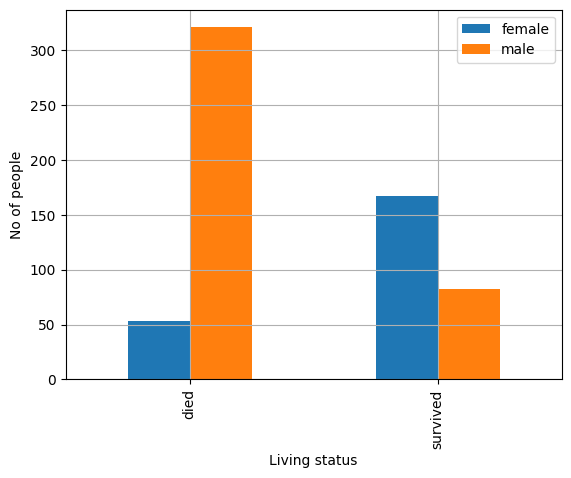

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
x.plot(kind='bar')
plt.grid(True)
plt.ylabel("No of people")
plt.xlabel("Living status")

##### graph showing male and female survival status per total number of male and female respectively

In [95]:
total_males = X_train[X_train["Sex"] == 1].shape[0]
total_females = X_train[X_train["Sex"] == 0].shape[0]
print(f"Total male: {total_males}\nTotal females: {total_females}")

Total male: 403
Total females: 220


In [96]:
x["female"] = x["female"]/total_females*100
x["male"] = x["male"]/total_males*100
print(x)

             female       male
died      24.090909  79.652605
survived  75.909091  20.347395


Text(0.5, 0, 'Living status')

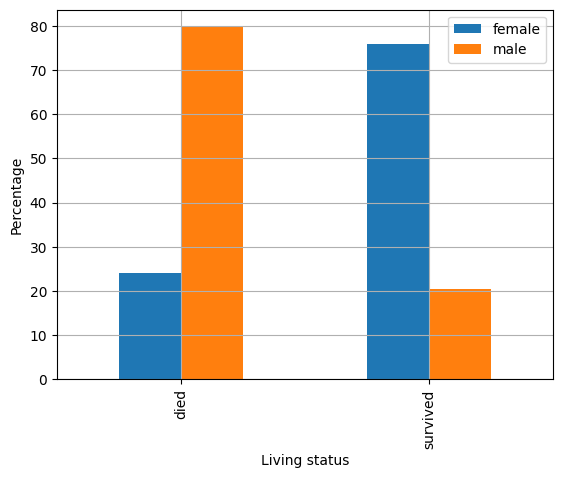

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
x.plot(kind='bar')
plt.grid(True)
plt.ylabel("Percentage")
plt.xlabel("Living status")

Surprisingly it is seen that almost 80% males died while almost 75% females survived

#### based on age

##### divide data according to age category

<Axes: >

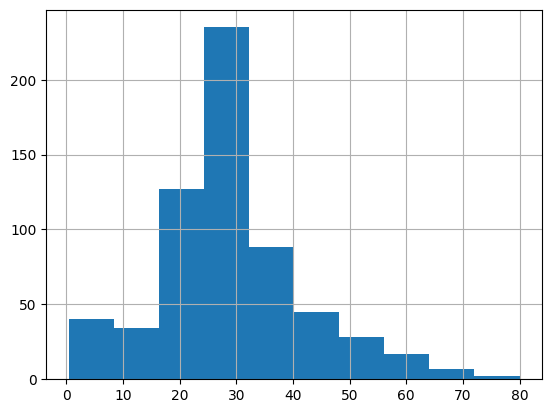

In [98]:
X_train["Age"].hist(bins = 10)

<Axes: >

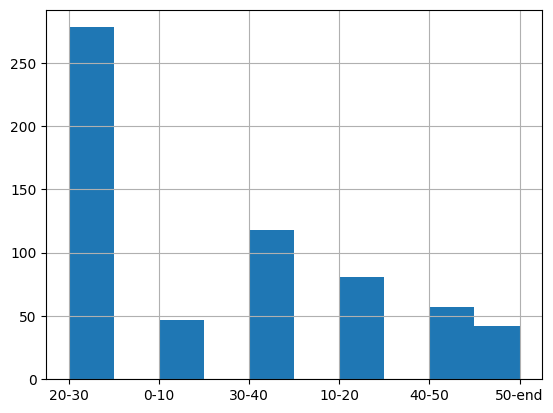

In [99]:
X_train["age_category"] = pd.cut(
                                X_train["Age"],
                                bins=[0., 10., 20., 30., 40., 50., np.inf],
                                labels=["0-10", "10-20", "20-30", "30-40", "40-50", "50-end"]
                                )
X_train["age_category"].hist()


it is evident that the ship contained most of the people in age group 20-30 years

In [141]:
x = X_train.groupby(["age_category", "Survived"]).size().unstack(fill_value=0)
# x.columns = ['female', 'male']
# x.index = ['died', 'survived']
x

/tmp/ipykernel_4701/1017478552.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = X_train.groupby(["age_category", "Survived"]).size().unstack(fill_value=0)


Survived,0.0,1.0
age_category,,
0-10,17,30
10-20,50,31
20-30,182,96
30-40,64,54
40-50,33,24
50-end,28,14


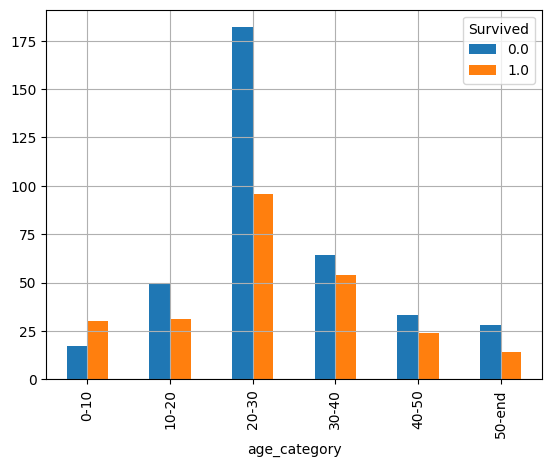

In [142]:
x.plot(kind="bar")
plt.grid(True)

In [133]:
x.iloc[0,1]

np.int64(30)

##### survival or death percentage according to age category

In [143]:
age_total_count = []
for i in range(len(x)):
    count = x.iloc[i].loc[0] + x.iloc[i].loc[1]
    age_total_count.append(count)
    # x.iloc[i].loc[0] = x.iloc[i].loc[0]/count*100
    # x.iloc[i].loc[1] = x.iloc[i].loc[1]/count*100
for i in age_total_count:
    print(int(i))

47
81
278
118
57
42


In [144]:
for i in range(len(x)):
    x.iloc[i, 0] = float(int(x.iloc[i, 0])/int(age_total_count[i]))*100
    x.iloc[i, 1] = float(int(x.iloc[i, 1])/int(age_total_count[i]))*100


/tmp/ipykernel_4701/1547325009.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36.17021276595745' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.iloc[i, 0] = float(int(x.iloc[i, 0])/int(age_total_count[i]))*100
/tmp/ipykernel_4701/1547325009.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '63.829787234042556' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x.iloc[i, 1] = float(int(x.iloc[i, 1])/int(age_total_count[i]))*100


In [145]:
x

Survived,0.0,1.0
age_category,,
0-10,36.170213,63.829787
10-20,61.728395,38.271605
20-30,65.467626,34.532374
30-40,54.237288,45.762712
40-50,57.894737,42.105263
50-end,66.666667,33.333333


Text(0, 0.5, 'Percentage')

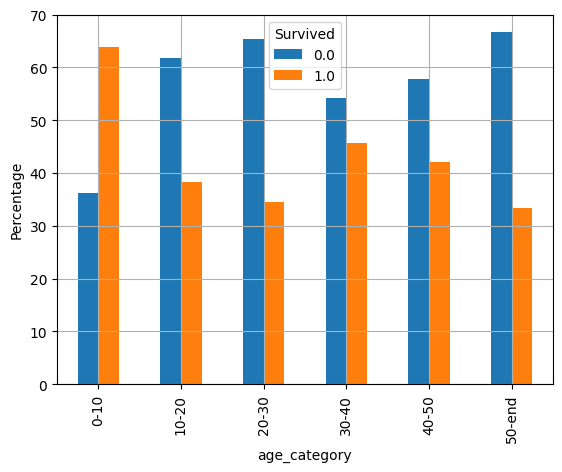

In [146]:
x.plot(kind="bar")
plt.grid(True)
plt.ylabel("Percentage")

so it can clearly be concluded that children of age group 0 to 10 are the maximum to survive and the people within the age 50 till end are the maximum to die

#### based on both sex and age group

In [ ]:
x = X_train.groupby(["Sex", "Survived", "age_category"]).size().unstack(fill_value=0)
# x.columns = ["age_category", "Sex", "dead", "alive"]
x

array([[<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>]],
      dtype=object)

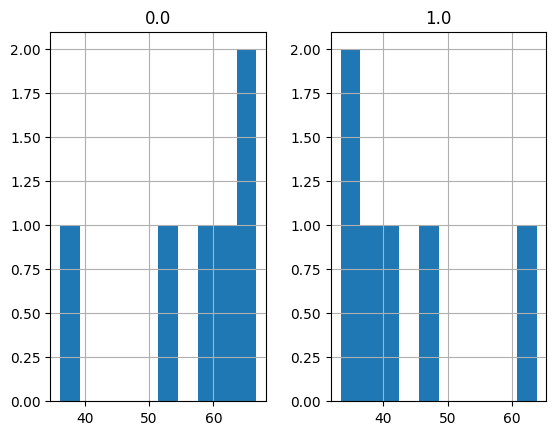

In [148]:
x.hist()

not so conclusive

#### based on fare

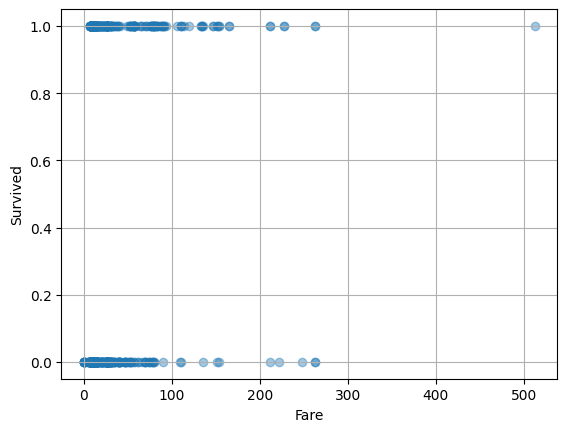

In [147]:
plt.scatter(X_train["Fare"], X_train["Survived"],  alpha=0.4)
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.grid(True)

In [ ]:
X_train["Fare"].hist(bins = 50)

not so conclusive

#### Drop the age category column as it was only added for our convenience

In [150]:
X_train.drop(columns=["age_category"], inplace=True)

In [151]:
X_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,98.0,1.0,1.0,23.0,0.0,1.0,63.3583,1.0,1.0,0.0,0.0
1,199.0,1.0,3.0,28.0,0.0,0.0,7.7500,0.0,0.0,1.0,0.0
2,11.0,1.0,3.0,4.0,1.0,1.0,16.7000,0.0,0.0,0.0,1.0
3,809.0,0.0,2.0,39.0,0.0,0.0,13.0000,1.0,0.0,0.0,1.0
4,207.0,0.0,3.0,32.0,1.0,0.0,15.8500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
618,132.0,0.0,3.0,20.0,0.0,0.0,7.0500,1.0,0.0,0.0,1.0
619,693.0,1.0,3.0,28.0,0.0,0.0,56.4958,1.0,0.0,0.0,1.0
620,232.0,0.0,3.0,29.0,0.0,0.0,7.7750,1.0,0.0,0.0,1.0
621,871.0,0.0,3.0,26.0,0.0,0.0,7.8958,1.0,0.0,0.0,1.0


### Model Training

In [159]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train.values, y_train.values)

SGDClassifier(random_state=42)

In [166]:
X_train.values[0].reshape(1, -1)

array([[98.    ,  1.    ,  1.    , 23.    ,  0.    ,  1.    , 63.3583,
         1.    ,  1.    ,  0.    ,  0.    ]])

In [170]:
sgd_classifier.predict(X_train.values[50].reshape(1, -1))

array([0])

In [169]:
print(y_train.iloc[50])

0


In [173]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train.values, y_train.values, scoring="accuracy", cv=3)

array([0.43269231, 0.625     , 0.68115942])

In [ ]:
cross_val_score(sgd_classifier, X_train.values, y_train.values, scoring="recall", cv=3)